In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Parametri di input
dz = 0.01  # Spessore degli strati (km)
ztop = 30  # Altezza massima (km)
h = 7  # Altezza scala (km)
w1 = 0.05  # Mixing ratio 1 (concentrazione gas 1)
w2 = w1 * 2  # Mixing ratio 2 (concentrazione gas 2)
k = np.array([0.1, 1, 2, 5, 20])  # Sezioni d'urto (Area per unità di massa)


In [3]:
# Creazione dell'asse delle altezze
z = np.arange(0, ztop + dz, dz)
n = len(z)

# Calcolo del profilo di densità dell'aria secca e dell'assorbitore
#Il gas assorbitore è proporzionale alla densità dell'aria secca con un mixing ratio w
rhodry = 1.25 * np.exp(-z / h)  # Profilo di densità aria secca
rho1 = rhodry * w1 # densità gas 1 
rho2 = rhodry * w2 # densità gas 2

# Normalizzazione degli integrali della densità
norm1 = h * (1 - np.exp(-ztop / h)) * w1
norm2 = h * (1 - np.exp(-ztop / h)) * w2

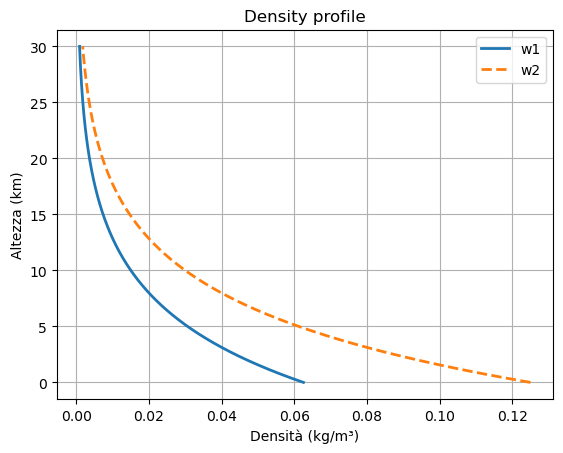

In [4]:
# Plot del profilo di densità
plt.figure()
plt.plot(rho1, z, label="w1", linewidth=2)
plt.plot(rho2, z, '--', label="w2", linewidth=2)
plt.xlabel("Densità (kg/m³)")
plt.ylabel("Altezza (km)")
plt.title("Density profile")
plt.legend()
plt.grid()

In [5]:
# Definizione dell'asse delle altezze
n = z.size  # Numero di strati atmosferici
m = k.size  # Numero di coefficienti di assorbimento k (cross section)

# Creazione della matrice Optical Depth (OD)
od_matrix = k[:, None] * rho1 * dz  # Matrice (m x n) 
od_matrix2 = k[:, None] * rho2 * dz  # Matrice (m x n) 

print(od_matrix.shape) # shape cross section x n layer

(5, 3001)


In [6]:
# Calcolo Optical Depth cumulativa dalla superficie al TOA (TRASFERIMENTO RADIATIVO)
od_cumulative = np.cumsum(od_matrix[:, ::-1], axis=1)[:, ::-1]  # Somma dal basso verso l'alto
od_cumulative2 = np.cumsum(od_matrix2[:, ::-1], axis=1)[:, ::-1]  # Somma dal basso verso l'alto

# Calcolo della trasmissività dalla superficie al TOA
tau_surface_to_toa = np.exp(-od_cumulative)  # Matrice (m x n)
tau_surface_to_toa2 = np.exp(-od_cumulative2)  # Matrice (m x n)

print(od_cumulative.shape)

(5, 3001)


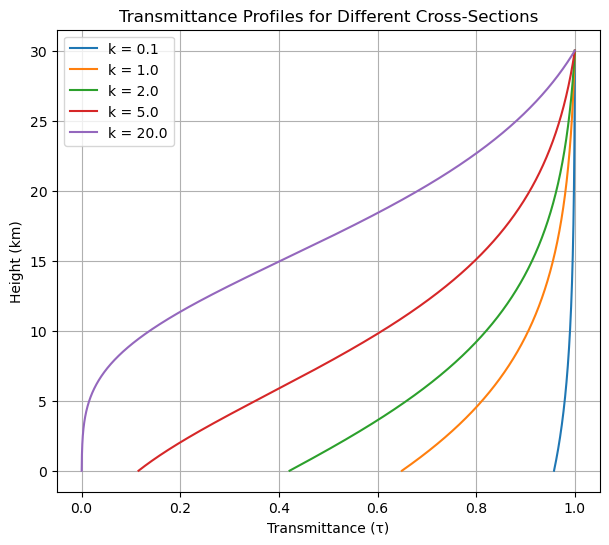

In [7]:
# Plot dei profili di trasmittanza per i vari valori di coe
plt.figure(figsize=(7, 6))
for i in range(m):
    plt.plot(tau_surface_to_toa[i, :], z, label=f'k = {k[i]}')

plt.xlabel("Transmittance (τ)")
plt.ylabel("Height (km)")
plt.title("Transmittance Profiles for Different Cross-Sections")
plt.legend()
plt.grid()


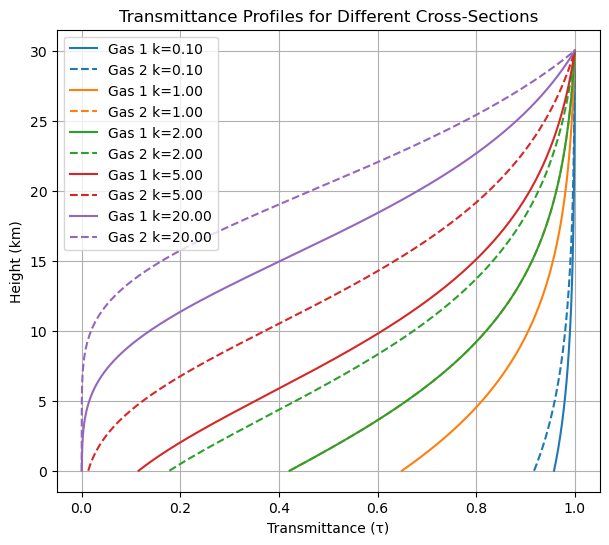

In [8]:
# Plot dei profili di trasmittanza per i vari valori di coe
plt.figure(figsize=(7, 6))
cmap = plt.get_cmap('tab10')  # Usa 'viridis', 'plasma', ecc. se preferisci



for i in range(m):
    color = cmap(i)  # Assegna un colore univoco alla coppia di linee

    plt.plot(tau_surface_to_toa[i, :], z, label=f'Gas 1 k={k[i]:.2f}', color=color)
    plt.plot(tau_surface_to_toa2[i, :], z, label=f'Gas 2 k={k[i]:.2f}', color=color, linestyle='--')


plt.xlabel("Transmittance (τ)")
plt.ylabel("Height (km)")
plt.title("Transmittance Profiles for Different Cross-Sections")
plt.legend()
plt.grid()


In [10]:
# Calcolo della matrice delle funzioni peso (Weighting Functions)
w_matrix = np.diff(tau_surface_to_toa, axis=1) / dz  # Differenze finite tra gli strati

# Aggiungiamo una colonna finale di zeri per mantenere la stessa dimensione di tau_matrix
w_matrix = np.hstack([w_matrix, np.zeros((m, 1))])


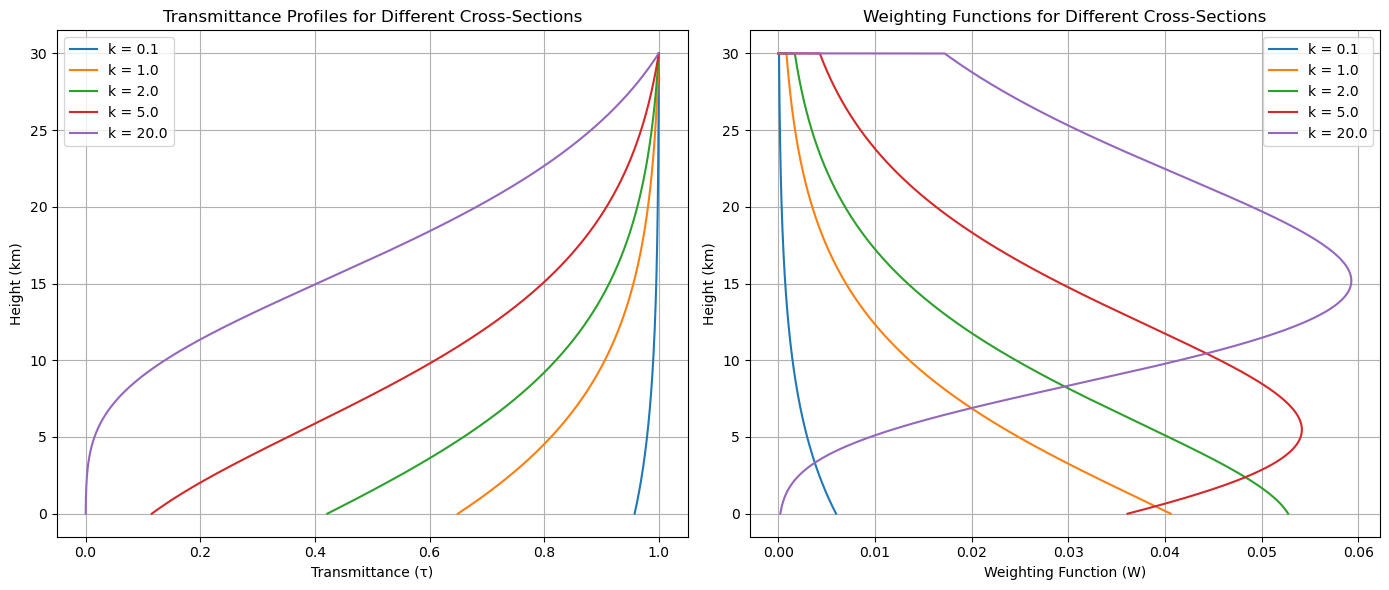

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Plot della trasmissività (tau)
for i in range(m):
    axs[0].plot(tau_surface_to_toa[i, :], z, label=f'k = {k[i]}')

axs[0].set_xlabel("Transmittance (τ)")
axs[0].set_ylabel("Height (km)")
axs[0].set_title("Transmittance Profiles for Different Cross-Sections")
axs[0].legend()
axs[0].grid()

# Plot della funzione di ponderazione (W)
for i in range(m):
    axs[1].plot(w_matrix[i, :], z, label=f'k = {k[i]}')

axs[1].set_xlabel("Weighting Function (W)")
axs[1].set_ylabel("Height (km)")
axs[1].set_title("Weighting Functions for Different Cross-Sections")
axs[1].legend()
axs[1].grid()

# Mostra entrambi i plot
plt.tight_layout()